# Machine Learning - 2<sup>st</sup> Assignment

## Student: Sheedeh Sharif Bakhtiar
### Student ID: 400422108

> Code + data can also be found [here on my GitHub](https://github.com/SSBakh07/Statistical-ML---Spring-2023)

<a id="top"></a>

<a id="ex1"></a>
# **Exercise 1:**

## *Is it possible for an SVM classifier to provide a confidence score or probability when making predictions on a particular instance? Explain it.*

**Support vector machines (SVMs)**, also known as *support vector networks* are supervised machine learning models used in both regression and classification tasks. Concisely put, they work by finding a hyperplane in an $n$-dimensional space (with $n$ being the number of features) that (hopefully) separate our data points such that data points belonging to one class reside on one side of the hyperplane and data points that belong to the other class reside on the other side of the hyperplane. In other words, this hyperplane is defined such that where a specific data point resides relative to the hyperplane denotes what class this point belongs to.

Mathematically, the hyperplane is defined as follows:

$$
f(X) = \beta_0 + ∑^{N}_{i=1}\beta_iX_i
$$

Where $\beta_0$ is our intercept, and $\beta_i$ are the coefficients that define where our hyperplane lies in $n$ dimensional space. We try to define our hyperplane such that we maximize the margin between data points of different classes.

Whether $f(X_i)>0$ hold for a specific sample $X_i$ would dictate what class this data sample belongs to. However, it is important to note that usually, our data isn't so easily separable such that we can find a hyperplane that cleanly splits our space into two regions, so something known as a *soft margin*, where we can allow points to be misclassified to a certain degree. However, this is beyond the scope of this question.

In general, SVMs are better suited when the classes are relatively separate, otherwise logistic regression and SVMs have similar performance.

However, it should be noted that the SVMs described above are inherently binary classifiers, as the hyperplane divides the space into two regions. In multi-class scenarios, we can choose one of two approaches:
1. **One-vs-One (OvO):** In this approach, we train pair-wise classifiers for each $\binom{k}{2}$ class combinations for all $k$ classes, and for each new data point we wish to classify, we pick the class that wins the most pairwise battles between all the other classes. This solution is more preferred when the number of classes is low.
2. **One-vs-Rest (OvR):** In this approach, we train one classifier for each of the $k$ classes. Each of these $k$ classes serve to classify points of one class against the rest of the classes in a binary classification task. The class with the classifier that has the largest value of $\hat{f_k}(x^{*})$ (e.g. class corresponding to classifier that denotes the point to have the most distance from the hyperplane in the positive region) is considered to be the data point's class.

However, now that I've outlined how SVMs work, we can tackle whether confidence scores are possible when utilizing SVMs for a specific classification task. 

A method for calculating confidence scores would be to take the data point's distance from the hyperplane (e.g. $\left | \hat{f_k}(x^{*}) \right |$) into account. In other words, our SVM score would directly correlate to our classifier's *confidence*.

However, as SVMs are, it is impossible to obtain probabilities as SVMs by nature are *not* probabilistic. However, we can introduce probabilities into our classifier. [As referenced in a Cross Validated question](https://stats.stackexchange.com/questions/55072/svm-confidence-according-to-distance-from-hyperline), [Platt (1999)](http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=BFDD4EA8843BCB150DD396F11F01075E?doi=10.1.1.41.1639&rep=rep1&type=pdf) describes a method for obtaining probabilities, as it appears that class conditional densities between margins are exponential. Platt describes a sigmoid model suggested by Bayes' rule as such:

$$
P(y=1 | f) = \frac{1}{1 + exp(Af + B))}
$$

Which is equivalent to assuming the output of the SVM is proportional to the log-likelihood of a positive training example. $A$ and $B$ are parameters that can be found. 

In conclusion, SVMs do not output probabilities, but we can add elements that can help us transform distance to hyperplane to probabilities.


*Sources:*
- [Wikipedia: Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine)
- [Towards Data Science: Support Vector Machine — Introduction to Machine Learning Algorithms](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
- [Tibshirani's Slides on Statistical Learning](https://scheshmi.github.io/CS-SBU-MachineLearning-2023/resources/slides) 
- [Prateek Joshi: How To Compute Confidence Measure For SVM Classifiers](https://prateekvjoshi.com/2015/12/15/how-to-compute-confidence-measure-for-svm-classifiers/)

<a id="ex2"></a>

# **Exercise 2:**

## *What actions should you take if you have trained an SVM classifier using an RBF kernel but notice that it underfits the training set? Would it be appropriate to increase or decrease the value of γ (gamma) or C, or both?*



Before I answer this question, I'll first briefly explain what $γ$ and $C$ are in the context of support vector machines;

$C$ is a regularization parameter that denotes how tolerant we want our SVM to be towards misclassifications. In other words, $C$ denotes how much we penalize our classifier for misclassifying each point. The larger $C$ is, the smaller our margin is, and the smaller $C$ is, the larger our margin is. Increasing $C$ until there are no more improvements may not be a good idea through, because a small margin means that we may risk overfitting on the training set. Similarly, small values for $C$ may also be bad, as if $C$ is small enough, you might get misclassified examples even if the training data is linearly separable. Similar to learning rates in other machine learning models, a balance is needed.

$γ$ is a hyperparameter used in non-linear SVMs, such as SVMs that use non-linear kernels such as RBF. The RBF kernel is defined as below:

$$
K(X_1, X_2) = exp(- \gamma \left \| X_1 - X_2 \right \|^2)
$$

Where $\gamma$ is our parameter in question.

In non-mathematical terms, the RBF kernel function for two points $X_1$ and $X_2$ compute similarity or how close they are to each other.

When tuning linear SVMs, we only need to worry about one parameter; $C$. However, should we be using a kernel such as RBF, not only do we have two parameters ($C$ *and* $γ$) but these two influence each other. If $γ$ is large, than the influence of $C$ becomes negligible. If $γ$ is too small, then $C$ alters the model just like it would on a linear model.


*Sources:*
- [Medium: What is the Significance of C value in Support Vector Machine?](https://medium.com/@pushkarmandot/what-is-the-significance-of-c-value-in-support-vector-machine-28224e852c5a)
- [Cross Validated: What is the influence of C in SVMs with linear kernel?](https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel)
- [Towards Data Science: SVM Hyperparameters Explained with Visualizations](https://towardsdatascience.com/svm-hyperparameters-explained-with-visualizations-143e48cb701b#:~:text=Gamma%20is%20a%20hyperparameter%20used,of%20a%20single%20training%20point.)


# **Exercise 3:**

## *What does it mean for a model to be ϵ-insensitive?*

Epsilon insensitive means that in our model's cost function, there is a margin of error that is ignored such that should a misclassified data point fall within the range of $|\epsilon|$ around our decision boundary, our loss function will choose to ignore that misclassification. By defining an error-insensitive margin like this, we can avoid overfitting to data points that lie very very closely to the decision boundary.

$\epsilon$ can be thought of as a tube around our decision boundary (e.g. for an SVM it would be a hyperplane, such that should an error fall *within* that tube, it'll be ignored. Hence, the phrase "$\epsilon$-insensitive". This concept is not unique to SVMs, and can be used in other models as well.


*Sources:*
- [Andrew Zisserman's Machine Learning Slides on Regression](https://www.robots.ox.ac.uk/~az/lectures/ml/2011/lect6.pdf)
- [Towards Data Science: Understanding SVR and Epsilon Insensitive Loss with Scikit-learn](https://towardsdatascience.com/understanding-svr-and-epsilon-insensitive-loss-with-scikit-learn-28ec03a3d0d9)
- [Cross Validated: Meaning of Epsilon in SVM regression](https://stats.stackexchange.com/questions/259018/meaning-of-epsilon-in-svm-regression)


# **Exercise 4:**
## *What is the difference between hard margin and soft margin SVM? When would you use each one?*


As briefly mentioned in previous questions, SVMs work by finding a hyperplane in $m$ dimensional feature space that best separates the data into two parts. The class label associated with each point depends on where said point lies relative to this hyperplane.

The distance between each data point close to the hyperplane and the hyperplane itself is known as the *margin*. SVM is looking to maximize this margin as much as possible.

In general, we have two types of margins: *hard* margins and *soft* margins.

*Hard margins* are used when we don't want any misclassifications. This means that our hyperplane needs to be defined such that each point of each class lies on their side of the space divided by said hyperplane. Obviously, this is only possible when our data is linearly separable.

> For data to be linearly separable, there needs to exist a hyperplane where *all* points of one class lie on one side of the hyperplane and *all* points of the other class lie on the other. In other words, we're able to neatly separate data from different classes from one another.

*Soft margins* are used when the data is not linearly separable. In these cases, we need to define our margin such that errors are allowed to some capacity, because we're not able to separate our data so neatly. However, this new hyperplane that allows for misclassifications must be defined such that misclassification error is at a minimum, and the margin for points closest to the hyperplane is at a maximum. This trade-off between margin and misclassification is done using the parameter $C$, which dictates how much we wish to penalize our model for each misclassification. The exact details are discussed in [Exercise 2](#ex2).

However it should be noted that sometimes while our data might be linearly separable, but a soft margin would *still* be preferable. This is due to the fact that if we were to use a hard margin, we'd risk having a very small margin, where we'd risk overfitting, or we'd be far too sensitive to outliers that lie too close to said hard margin. So, we might want to prefer using a soft margin where we'd want to make sure our model is generalizing.

In summary, we might want to use hard margins when our data is linearly separable or we're looking to minimize misclassifications as much as possible. When our data is *not* linearly separable, and/or we're looking to prevent any potential overfitting, a soft margin would be more preferable.


*Sources:*
- [Baeldung: Using a Hard Margin vs. Soft Margin in SVM](https://www.baeldung.com/cs/svm-hard-margin-vs-soft-margin#:~:text=The%20difference%20between%20a%20hard,be%20feasible%20to%20do%20that.)
- [Section: Using a Hard Margin vs Soft Margin in Support Vector Machines](https://www.section.io/engineering-education/using-a-hard-margin-vs-soft-margin-in-support-vector-machines/)
- [Analytics Vidhya: Introduction to SVM](https://www.analyticsvidhya.com/blog/2021/04/insight-into-svm-support-vector-machine-along-with-code/)
- [Wikipedia: Linear Separability](https://en.wikipedia.org/wiki/Linear_separability)
- [StackOverFlow: SVM - hard or soft margins?](https://stackoverflow.com/questions/4629505/svm-hard-or-soft-margins)

# **Exercise 5:**
## *Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?*

During the decision tree learning process, at each split we are looking for the "decision" that will best fulfill some sort of condition based on some metric. One of the metrics used to makes said decisions, is the Gini impurity measure, which we are looking to decrease at every step.

The Gini impurity measure is defined as such: 

If we have a total of $C$ classes and $p(i)$ is the probability of picking a datapoint with class $i$, then the Gini impurity is calculated as such:

$$
G = \sum^{C}_{i=1}p(i) * (1 - p(i))
$$

Intuitively, this metric simply gives us a hint as to what the probability of misclassifying an observation is, thus at each step we are looking to decrease it. The lower our Gini impurity is at each step, the better, because this decreases the probability of misclassification. We make splits that give us the most possible *Gini gain*, meaning the highest difference in Gini impurity before and after the split.

Therefore, the Gini impurity of a child node is always decreasing, otherwise, a split just wouldn't be made.

- [Towards Data Science: ](https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33)
- [Victor Zhou: A Simple Explanation of Gini Impurity](https://victorzhou.com/blog/gini-impurity/)
- [Wikipedia: Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning#:~:text=Gini%20impurity%20measures%20how%20often,into%20a%20single%20target%20category.)

# **Exercise 6:**
## *Is it a good idea to consider scaling the input features if a Decision Tree underfits the training set?*

In general, due to how decision trees work by trying to decrease Gini impurity at each step, this specific algorithm (and by extension, decision tree-derived algorithms such as [random forest](https://en.wikipedia.org/wiki/Random_forest)) is not sensitive to feature scaling or any sort of normalization. This is because the split on a feature is not influenced by other features.

Therefore, if our decision tree model is underfitting, features scaling will not have much of an effect, however, hyperparameter tuning such as increasing the number of splits/increasing the depth of the tree, or utilizing ensemble methods may help alleviate the problem.

*Sources:*
- [atoti: When to perform Feature Scaling?](https://www.atoti.io/articles/when-to-perform-a-feature-scaling/#:~:text=The%20decision%20tree%20splits%20a,the%20scale%20of%20the%20features.)
- [Forcastegy: Do Decision Trees Need Feature Scaling Or Normalization?](https://forecastegy.com/posts/do-decision-trees-need-feature-scaling-or-normalization/)


# **Exercise 7:**
## *How can you use tree-based models for feature selection?*

We can calculate feature importance by fitting our tree to our data. In general, at every level splits are made based on gini impurity decrease, and the more important a feature is at a certain split, the greater the impurity decrease is. 

We can determine feature importance by averaging the impurity decrease per-feature across all splits, resulting in an approximate ranking of features based on importance.

However, it should be noted that the metric used during splitting (Gini impurity or otherwise) influences the potential ranking of variables, so we should take care in choosing our splitting metric wisely.

*Sources:*
- [Towards Data Science: Feature Selection Using Random forest](https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f)
- [Busigence: Feature selection using Decision Tree](https://busigence.com/blog/feature-selection-using-decision-tree)

# **Exercise 8:**
## *How do you tweak the hyperparameters of the following model in mentioned circumstances:*
### *AdaBoost - Underfitting*

AdaBoost — as the name suggests, is a popular boosting algorithm which takes several weak learners to combine them into a single strong learner.

> [Boosting](https://en.wikipedia.org/wiki/Boosting_(machine_learning)) is a family of ensemble meta-learners with the motivation of creating a strong learner by grouping a number of weak learners to work together. By grouping a number of different predictors together, we can reduce the bias in our model while keeping variance fixed.

The most common estimator used in AdaBoost are decision trees with a single split, also known as a *stump*. AdaBoost ensembles have a number of different parameters (for example, [scikit-learn's documentation on `sklearn.ensembleAdaBoostClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)), but should we be faced with a situation where our AdaBoost model is underfitting, we can attempt to alleviate the problem by increasing the number of weak learners in our ensemble.


### *Gradient Boosting - Overfitting*

Gradient Boosting, much like AdaBoost, is an ensemble method where several weak learners come together to make a single strong learner. The difference between these two is in how these weak learners are created during the iterative process. For one, Gradient boosting methods train on error residuals, while AdaBoost does not.

If our Gradient Boosting model is overfitting, we can reduce the number of weak learners, or decrease the "strength" of each of the weak learners.


*Sources:*
- [Wikipedia: AdaBoost](https://en.wikipedia.org/wiki/AdaBoost)
- [Paperspace: A Guide to AdaBoost: Boosting To Save The Day](https://blog.paperspace.com/adaboost-optimizer/)
- [Wikipedia: Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting)
- [Quora: What is the difference between gradient boosting and AdaBoost?](https://www.quora.com/What-is-the-difference-between-gradient-boosting-and-AdaBoost)

# **Exercise 9:**
## *What is the difference between homogeneous and heterogeneous ensembles? Which one is more powerful?*

As briefly mentioned in previous questions, ensembles are a group of machine learning models working together to create one, single model that is stronger than each of the individual models. 

In general, we can divide ensemble models into two different categories: 

- *Homogenous* ensembles which are a collection of classifiers all with the same type (e.g. all of the classifiers are decision trees, or logistic regression models) but built on different subsets of the data. An example of this would be random forest classifiers, where all classifiers are decision trees, but each tree is trained on different data. These algorithms should not be fine-tunes and should be left weak. This way, we can reduce the risk of over-fitting.

- *Heterogenous* ensembles are a collection of classifiers with different types, but each have a different types. For instance, an ensemble of logistic regressors, decision trees and SVMs all trained on the same data would be considered an ensemble of this type.

While homogenous models are incredibly powerful, they also need a lot of data. Similarly, heterogenous ensembles can be quite powerful as well, but depending on the models used in the ensemble, they might be a bit computationally expensive to train.

*Sources:*
- [Analytics Vidhya: Exploring Ensemble Learning in Machine Learning World!](https://www.analyticsvidhya.com/blog/2021/01/exploring-ensemble-learning-in-machine-learning-world/#:~:text=HOMOGENEOUS%20ENSEMBLE%20is%20a%20collection,in%20the%20Random%20Forest%20model.&text=HETEROGENEOUS%20ENSEMBLE%20is%20a%20set,built%20upon%20the%20same%20data.)
- [Stack OverFlow: Homogeneous vs heterogeneous ensembles](https://stackoverflow.com/questions/49445446/homogeneous-vs-heterogeneous-ensembles)

# **Exercise 10:**
## *How ROC and AUC are being used in the evaluation of classification performance?*

A *receiver operating characteristic curve* (better known as an *ROC curve*) is a graph which shows the performance of a classification model at all classification threshold. This curve plots two parameters against each other; the true positive rate and the false positive rate.

> The true positive rate (also known as *recall* is a reflection of the number of predictions the classifier has *correctly* classified as part of a specific class and the false positive rate is a reflection of the number of predictions that the classifier has flagged as a false positive.

*AUC* (which stands for *"Area under the ROC curve"*) measures the area underneath the ROC curve for the purpose of providing an aggregate measure of performance across all possible classification thresholds.

The value of AUC dictates the measure of separability in a model, in other words, how well our model can separate the classes from one another. Optimally, we'd want our AUC to be 1, meaning that it's always able to separate the classes. When AUC is at 0.5, our model is no better than a random model, which is considered to be the worst case scenario. In other words, AUC gives us an estimated probability of classifying a data point correctly (e.g. an AUC of 0.7 would mean we have 70% chance of classifying a point correctly).

In summary, the AUC is obtained from the ROC, and using the AUC we can gauge how well our classifier is performing given metrics such as the true positive rate and false positive rate.

In a multiclass scenario, we could plot the classes against each other in a one-vs-all scenario, thus extending this metric to a multiclass setting.


*Sources:*
- [Google: Classification: ROC Curve and AUC](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=AUC%20stands%20for%20%22Area%20under,across%20all%20possible%20classification%20thresholds.)
- [Towards Data Science: Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

# **Exercise 11:**
## *How does the threshold value used in classification affect the model's performance? This value specifies a cut-off for an observation to be classified as either 0 or 1. Can you explain the trade-off between false positive and false negative rates, and how the choice of threshold value impacts precision and recall?*

Many classification models do not output 0s and 1, but instead output confidences, or the probability that a certain data sample belongs to a certain class. To convert these continuous values into a discrete 0 and 1 for our final prediction, we define a *threshold value*, at which we divide our model output into two parts; anything less than this threshold value would be considered a 0, and anything more than equal to this threshold value would be considered a 1.

While by default, most model's threshold value is set to 0.5, this might not always be the best choice. In fact, we need to take care in how we pick our threshold value, as this specific value is problem-specific and should be fine tuned.

For instance, in some problems we might be sensitive towards false positives (for example, it's better to erronously flag a patient's test results as potentially bad as opposed to accidentally classifying a sick patient as healthy) and in some problems we may want to avoid false negatives more. Therefore, the specific trade-off between false positives and false negatives is completely domain-specific.

One of the best ways to pick our threshold value is by utilizing ROC curves, which were discussed in the previous exercise, or a precision-recall curve.

> The ratio of true positives to the sum of true positives and false positives is called *precision*. As the name suggests, precision indicates the model's *precision*, as in, how confident we can be in our prediction when our model assumes a data sample is positive (e.g. our model output is 1).

A precision-recall curve solely focuses on the performance of the classifier on the positive class, so if we are looking to fine-tune our model in favor of having greater precision (e.g. being more confident when it comes to positive predictions) or greater recall (e.g. being more likely to flag a data sample as positive), we can use this specific graph.


*Sources:*
- [DeepChecks: What is a Threshold in Machine Learning](https://deepchecks.com/glossary/classification-threshold/#:~:text=A%20classification%20threshold%20value%20must,always%20going%20to%20be%200.5%E2%80%A6)
- [iguazio: What is the Classification Threshold in Machine Learning?](https://www.iguazio.com/glossary/classification-threshold/)


# **Exercise 12:**
## *What is the difference between one-vs-one and one-vs-all multiclass classification approaches in classifiers? Under what circumstances would you use one over the other?*

As extensively explained in [Exercise 1](#ex1), both OvO and OvA are methods for combining various binary classifiers into a singular multiclass classifier.

> In summary, OvO (one vs. one) trains a number of pairwise classifiers, and for each new data sample that is to be classifier, the class that wins the most one-on-one classifications is considered to be the new sample's class. On the other and, OvA (one vs. all) trains $k$ classifiers for each class, and the class with the highest confidence is considered to be the new data point's class.

OvO is preferable when we don't have many classes, as it might be computationally expensive to train many pairwise classifiers for each possible combination of classes. However, with this approach we'll have more confidence in our specific classification, because we'll have taken all class pairs into consideration.

On the otherhand, if there are a large number of classes and we're looking to be computationally efficient, then OvA would be more preferable.

(*Sources all listed in [Exercise 1](#ex1)*)


# **Exercise 13:**
## *In this part, you are going to work with the Vehicle Insurance Claim Fraud Detection dataset. You will implement multiple classification models using the Scikit-Learn package to predict if a claim application is fraudulent or not, based on about 32 features. You are expected:*
### *Perform exploratory data analysis on the dataset.*

In [77]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load data
raw_df = pd.read_csv("./data/fraud_oracle.csv")
raw_df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [78]:
# For simplicity's sake, I'll define a target_col variable so I don't need to worry about spelling the column name correctly every time
target_col = 'FraudFound_P'

Checking for NA data:

In [79]:
# Check for na data

raw_df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

Thankfully, there's no null data.

We'll make a copy of the raw data so we can alter our data without any fear:

In [80]:
# Make copy of raw dataframe 
df = raw_df.copy()

# Drop columns that we don't need
irrelevant_columns = ["PolicyNumber"]

df.drop(irrelevant_columns, axis=1, inplace=True)

There are a number of categorical columns that need to be fixed — and with some columns this is easier to do than others.

In [81]:
cat_columns = ["Month", "DayOfWeek", "Make", 
               "AccidentArea", "DayOfWeekClaimed", "MonthClaimed", "Sex", 
               "MaritalStatus", "Fault", "Days_Policy_Claim", "PastNumberOfClaims",
              "WitnessPresent", "PastNumberOfClaims", "AgeOfVehicle", 
               "AgeOfPolicyHolder", "PoliceReportFiled", "AgentType", 
               "NumberOfSuppliments", "AddressChange_Claim", "NumberOfCars", 
               "BasePolicy", "VehicleCategory", 'Days_Policy_Accident']

cat_dict = {}


for col in cat_columns: 
    cat_dict[col] = pd.Categorical(df[col])
    df[col] = cat_dict[col].codes

df[cat_columns].head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,Days_Policy_Claim,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,VehicleCategory,Days_Policy_Accident
0,2,6,6,1,6,5,0,2,0,2,...,1,3,0,0,3,0,2,2,1,3
1,4,6,6,1,2,5,1,2,0,2,...,4,4,1,0,3,3,0,1,1,3
2,10,0,6,1,5,10,1,1,0,2,...,5,6,0,0,3,3,0,1,1,3
3,6,2,17,0,1,6,1,1,1,2,...,6,7,1,0,2,3,0,2,1,3
4,4,1,6,1,6,4,0,2,1,2,...,3,4,0,0,3,3,0,1,1,3


However, not all columns have been converted to their respectful categorical codes. For instance, there's `PolicyType` that seems to be a combination of two separate columns, and `VehiclePrice` which is a range of numbers:

In [82]:
df[["PolicyType", "VehiclePrice"]].head()

,PolicyType,VehiclePrice
0,Sport - Liability,more than 69000
1,Sport - Collision,more than 69000
2,Sport - Collision,more than 69000
3,Sedan - Liability,20000 to 29000
4,Sport - Collision,more than 69000


`VehiclePrice` doesn't pose much of a problem, as we can convert the ranges into categorical codes like I've done with the previous columns without losing information:

In [83]:
col = "VehiclePrice"
c = pd.Categorical(df[col])
cat_dict[col] = c
df[col] = c.codes
df[col].head()

0    5
1    5
2    5
3    0
4    5
Name: VehiclePrice, dtype: int8

A column similar to `VehiclePrice` is PastNumberOfClaims but for brevity I've fixed it in previous code cells.

Another interesting column is the `PolicyType`:

In [84]:
df["PolicyType"].head()

0    Sport - Liability
1    Sport - Collision
2    Sport - Collision
3    Sedan - Liability
4    Sport - Collision
Name: PolicyType, dtype: object

Looking closely, it almost appears as if it's a combination of two columns. In fact, the first word before the dash (`-`) appears to draw from the same set of categorical values as `VehicleCategory` and `BasePolicy`:

> It should be noted that in the previous cells when viewing the first 5 rows via `head()` of both `PolicyType` and `VehicleCategory` it was shown that these two columns would not be exactly alike. Needless to say though, in many cases what we're looking for wouldn't be found in the first 5 rows, therefore, we should always check and not rely on a cursery check.

In [85]:
# Using raw_df rather than df here as df's BasePolicy and VehicleCategory have already been transformed
raw_df[["VehicleCategory", "BasePolicy", "PolicyType"]].head()

,VehicleCategory,BasePolicy,PolicyType
0,Sport,Liability,Sport - Liability
1,Sport,Collision,Sport - Collision
2,Sport,Collision,Sport - Collision
3,Sport,Liability,Sedan - Liability
4,Sport,Collision,Sport - Collision


We can separate `PolicyType` into two different columns which we'll name `ptVehicle` and `ptBase`:

In [86]:
df['ptVehicle'] = df.PolicyType.map(lambda x: x.split("-")[0].replace(" ", ""))    # Remove extra space
df["ptBase"] = df.PolicyType.map(lambda x: x.split("-")[1].replace(" ", ""))

df[['ptVehicle', 'ptBase']]

,ptVehicle,ptBase
0,Sport,Liability
1,Sport,Collision
2,Sport,Collision
3,Sedan,Liability
4,Sport,Collision
...,...,...
15415,Sedan,Collision
15416,Sedan,Liability
15417,Sedan,Collision
15418,Sedan,AllPerils


We can now check to see if `ptVehicle` and `ptBase` come from the same sets of values as `VehicleCategory` and `BasePolicy`:

In [87]:
print("ptVehicle:")
print(df['ptVehicle'].unique())

print("VehicleCategory:")
print(raw_df['VehicleCategory'].unique())


print("ptBase:")
print(df['ptBase'].unique())


print("BasePolicy:")
print(raw_df['BasePolicy'].unique())

ptVehicle:
['Sport' 'Sedan' 'Utility']
VehicleCategory:
['Sport' 'Utility' 'Sedan']
ptBase:
['Liability' 'Collision' 'AllPerils']
BasePolicy:
['Liability' 'Collision' 'All Perils']


Knowing this, we can convert our two new columns into categorical values using the codes from our two other "original" columns `VehicleCategory` and `BasePolicy`.

In [88]:
cat_dict['ptVehicle'] = pd.Categorical(df.ptVehicle, categories=cat_dict["VehicleCategory"].categories)
df.ptVehicle = cat_dict['ptVehicle'].codes

cat_dict['ptBase'] = pd.Categorical(df.ptBase, categories=cat_dict["BasePolicy"].categories)
df.ptBase = cat_dict['ptBase'].codes

In [89]:
df[['ptVehicle', 'ptBase']].describe()

,ptVehicle,ptBase
count,15420.000000,15420.000000
mean,0.074773,0.747795
std,0.346270,1.189709
min,0.000000,-1.000000
25%,0.000000,-1.000000
50%,0.000000,1.000000
75%,0.000000,2.000000
max,2.000000,2.000000


We can now drop the `PolicyType` column as we don't need it anymore:


In [90]:
df.drop('PolicyType', axis=1, inplace=True)
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'VehicleCategory', 'VehiclePrice',
       'FraudFound_P', 'RepNumber', 'Deductible', 'DriverRating',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'ptVehicle', 'ptBase'],
      dtype='object')

We can add a couple extra features here that might help us later on:
- `vehDiff`: If the vehicle types in the policy and the actual car differ
- `baseDiff`: If the base policy types differ

In [91]:
df['vehDiff'] = df.ptVehicle == df.VehicleCategory
df.vehDiff = df.vehDiff.astype('int')

df['baseDiff'] = df.ptBase == df.BasePolicy
df.baseDiff = df.baseDiff.astype('int')

df[['vehDiff', 'baseDiff']].head()

,vehDiff,baseDiff
0,1,1
1,1,1
2,1,1
3,0,1
4,1,1


Just to make sure, we'll check both these columns to make sure every row doesn't contain the same value:

In [92]:
df[['vehDiff', 'baseDiff']].describe()

,vehDiff,baseDiff
count,15420.000000,15420.000000
mean,0.676589,0.711479
std,0.467793,0.453090
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Seeing as the `mean` value for both columns isn't 0.0 or 1.0, we can safely assume that neither of these columns are only 0 or only 1.

We can visualize the correlation between any differences between insurance policy or base policy and fraud:

<Axes: >

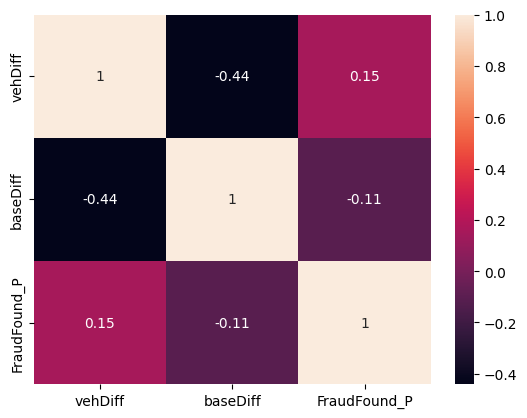

In [93]:
sns.heatmap(df[['vehDiff', 'baseDiff', target_col]].corr(), annot=True)

From this we can infer several different things:
- It's unlikely that both base policy and vehicle policy will differ for one claim, as the correlation value between `baseDiff` and `vehDiff` is a low negative number.
- While the base policy being different seems to have a negative correlation with whether or not the claim has been flagged as fradulent, whether or not the vehicle type is different seems to have a positive influence in a claim being fraudulent.

## Q: Class imbalance

<Axes: xlabel='FraudFound_P', ylabel='Count'>

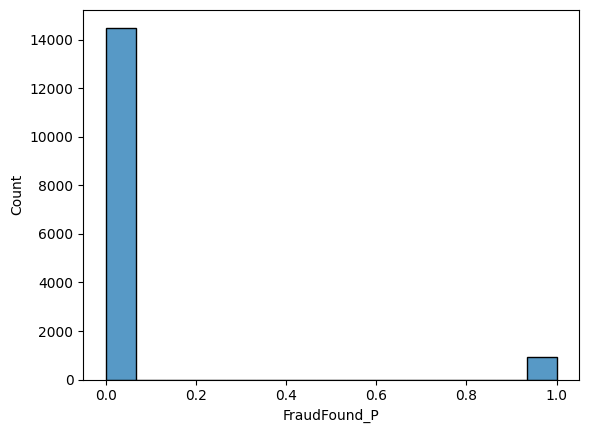

In [94]:
sns.histplot(df.FraudFound_P)

Class imbalance is really bad. However, as this issue is explored more in depth in later sections, I will move onto the next feature.

## Q: Sex imbalance

Here we'll check to see if the client's sex played in any role of fraudulent behavior:

In [95]:
df[df.FraudFound_P == 1].Sex.value_counts()

1    818
0    105
Name: Sex, dtype: int64

From this it's pretty obvious that there's a serious imbalance between sexes. It's safe to assume that in later sections of this question that this feature will play a role in our classifier.

## Q: Time of year, week, etc.

We can check number of fraudulent claims per month to see if there are any obvious correlations:

<Axes: >

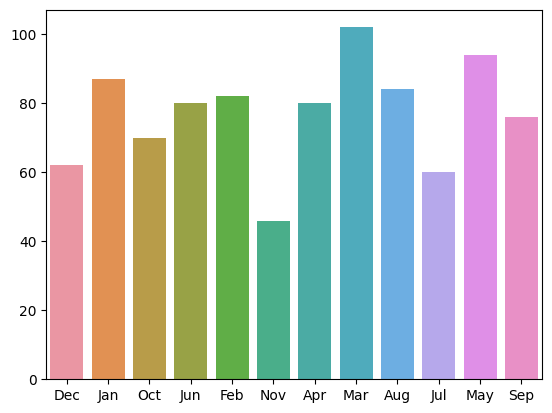

In [96]:
months = df.Month.unique().tolist()

fraud_counts = []

for month in months:
    fraud_counts.append(df.loc[(df.Month == month) 
                               & (df[target_col] == 1)].shape[0])


sns.barplot(x=[cat_dict['Month'].categories[i] for i in months], y=fraud_counts)

It appears that while there are less claims in November, the most number of claims is in March.

However, there is the obvious issue of total number of claims being made in a month, so I'll redo the analysis above, this time taking in the total number of claims made in a month into account;

<Axes: >

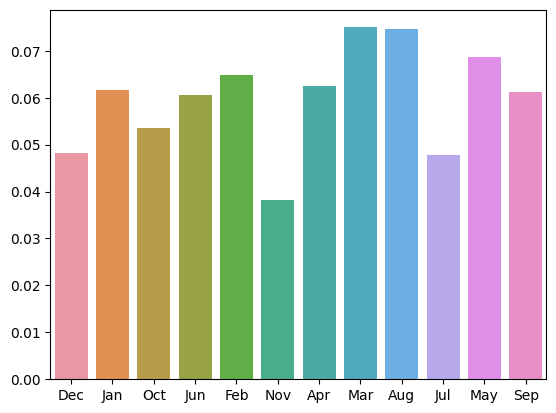

In [97]:
fraud_counts = []

for month in months:
    count_per_month = df.loc[(df.Month == month)]
    fraud_count = count_per_month.loc[df[target_col] == 1].shape[0]
    fraud_counts.append(fraud_count/count_per_month.shape[0])


sns.barplot(x=[cat_dict['Month'].categories[i] for i in months], y=fraud_counts)

Now that we've also captured the information regarding the number of claims made in *general* in a month, we have a better view of the percentage of claims being made each month being fraudulent and any correlation there may be between the month of the year and a particular claim being fraudulent.


We can repeat the same process for the days of the week, taking the number of claims being filed each particular day of the week into account;

<Axes: >

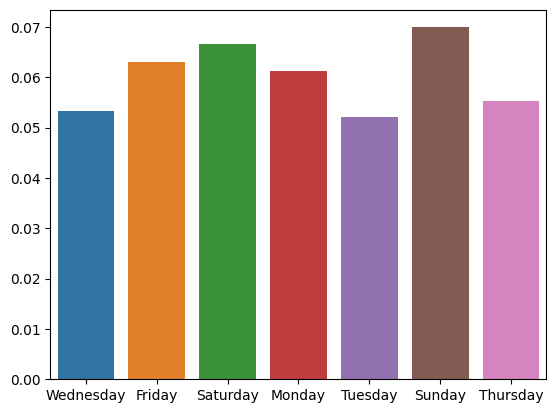

In [98]:
days = df.DayOfWeek.unique().tolist()

fraud_counts = []

for day in days:
    count_per_day = df.loc[(df.DayOfWeek == day)]
    fraud_count = count_per_day.loc[df[target_col] == 1].shape[0]
    fraud_counts.append(fraud_count/count_per_day.shape[0])


sns.barplot(x=[cat_dict['DayOfWeek'].categories[i] for i in days], y=fraud_counts)

By a slight margin, it appears that more fraudulent claims are made on Sunday more than any other day.

### *Try to tackle the problem using the following models:*

For the purposes of this exercise, I'll be using sklearn's implementation of [grid search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best possible hyperparameters (and thus, best possible accuracy given the range of hyperparameters) for each model.

Additionally, I'll be using sklearn's implementation of a [repeated stratified k-fold validator](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedStratifiedKFold.html) for cross validation.

After training each model, I'll compare their accuracies in a table.

In [120]:
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold

column_names = ["Model", "Accuracy"]
model_res = [] # Model name, accuracy, f1 score

seed = 3 # For reproducability

# Construct validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=20, random_state=seed)

# Divide the data into train/test splits
# Leaving 20% aside for final accuracy measurements
train_df, test_df = train_test_split(df, test_size=0.2, random_state=seed)

#### Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression

parameters = {
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
    'max_iter': range(50, 500, 50)
}

log_clf = LogisticRegression(random_state=seed)

# Instantiate the grid search model
grid_search_log = GridSearchCV(estimator=log_clf,
                           param_grid=parameters,
                           cv = cv,
                           n_jobs=-1, 
                           verbose=1, 
                          ).fit(train_df.drop(target_col, axis=1), train_df[target_col])

print(grid_search_log.best_params_)

Fitting 100 folds for each of 18 candidates, totalling 1800 fits
{'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}


c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [116]:
from sklearn.metrics import accuracy_score

print(f"Best model accuracy on training: {grid_search_log.best_score_}")

log_preds = grid_search_log.predict(test_df.drop(target_col, axis=1))
log_acc = accuracy_score(test_df[target_col], log_preds)

model_res.append(("Logistic Reg", log_acc))

print(f"Best model accuracy on test df: {log_acc}")

Best model accuracy on training: 0.940171055337259
Best model accuracy on test df: 0.9400129701686122


#### SVM

In [124]:
from sklearn.svm import SVC

parameters = {
    'C': [0.1, 0.5, 1.0, 1.5, 2.0, 10.],
    'degree': range(1, 5),
}

clf = SVC(random_state=seed)

grid_search_svc = GridSearchCV(
    estimator=clf,
    param_grid=parameters,
    n_jobs=-1,
    cv = cv,
    verbose=True
).fit(train_df.drop(target_col, axis=1), train_df[target_col])

print(grid_search_svc.best_params_)

Fitting 100 folds for each of 24 candidates, totalling 2400 fits
{'C': 0.1, 'degree': 1}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [125]:
print(f"Best model accuracy on training: {grid_search_svc.best_score_}")

svc_preds = grid_search_svc.predict(test_df.drop(target_col, axis=1))
svc_acc = accuracy_score(test_df[target_col], svc_preds)

model_res.append(("SVM", svc_acc))

print(f"Best model accuracy on test df: {svc_acc}")

Best model accuracy on training: 0.9401751088435418
Best model accuracy on test df: 0.9400129701686122


#### Decision-Trees

In [126]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'min_samples_split': range(2, 5),
    'criterion': ['gini', 'entropy', 'log_loss'],
}

clf = DecisionTreeClassifier(random_state=seed)

grid_search_tree = GridSearchCV(
    estimator=clf,
    param_grid=parameters,
    n_jobs=-1,
    cv = cv,
    verbose=True
).fit(train_df.drop(target_col, axis=1), train_df[target_col])

print(grid_search_tree.best_params_)

Fitting 100 folds for each of 9 candidates, totalling 900 fits
{'criterion': 'entropy', 'min_samples_split': 3}


In [127]:
print(f"Best model accuracy on training: {grid_search_tree.best_score_}")

tree_preds = grid_search_tree.predict(test_df.drop(target_col, axis=1))
tree_acc = accuracy_score(test_df[target_col], tree_preds)

model_res.append(("Decision Tree", tree_acc))

print(f"Best model accuracy on test df: {tree_acc}")

Best model accuracy on training: 0.8988449280913242
Best model accuracy on test df: 0.9088845654993515


#### Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=seed, n_jobs=-1)

params = {
    'max_depth': range(2, 10, 2),
    'min_samples_leaf': range(5, 50, 10),
    'n_estimators': range(10, 100, 25),
}

grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = cv,
                           n_jobs=-1, 
                           verbose=1, 
                          ).fit(train_df.drop(target_col, axis=1), train_df[target_col])

print(grid_search_rf.best_params_)

Fitting 100 folds for each of 80 candidates, totalling 8000 fits
{'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 10}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [130]:
print(f"Best model accuracy on training: {grid_search_rf.best_score_}")

rf_preds = grid_search_rf.predict(test_df.drop(target_col, axis=1))
rf_acc = accuracy_score(test_df[target_col], rf_preds)

model_res.append(("Random Forest", rf_acc))

print(f"Best model accuracy on test df: {rf_acc}")

Best model accuracy on training: 0.9402075303241031
Best model accuracy on test df: 0.940337224383917


####  KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': range(10, 100, 20),
    'p': [1, 2],
}

clf = KNeighborsClassifier()

# Instantiate the grid search model
grid_search_knn = GridSearchCV(estimator=clf,
                           param_grid=parameters,
                           cv = cv,
                           n_jobs=-1, 
                           verbose=1, 
                          ).fit(train_df.drop(target_col, axis=1), train_df[target_col])

print(grid_search_knn.best_params_)

Fitting 100 folds for each of 10 candidates, totalling 1000 fits
{'n_neighbors': 10, 'p': 1}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
print(f"Best model accuracy on training: {grid_search_knn.best_score_}")

knn_preds = grid_search_knn.predict(test_df.drop(target_col, axis=1))
knn_acc = accuracy_score(test_df[target_col], knn_preds)

model_res.append(("Random Forest", knn_acc))

print(f"Best model accuracy on test df: {knn_acc}")

Best model accuracy on training: 0.940365603929733
Best model accuracy on test df: 0.9400129701686122


####  Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

# This classifier doesn't have many hyperparameters to tune, so we'll simply fit.

clf.fit(train_df.drop(target_col, axis=1), train_df[target_col])

GaussianNB()

In [137]:
print(f"Best model accuracy on training: {clf.score(train_df.drop(target_col, axis=1), train_df[target_col])}")

nb_preds = clf.predict(test_df.drop(target_col, axis=1))
nb_acc = accuracy_score(test_df[target_col], nb_preds)

model_res.append(("Naive Bayes", nb_acc))

print(f"Best model accuracy on test df: {nb_acc}")

Best model accuracy on training: 0.7812905317769131
Best model accuracy on test df: 0.7931258106355382


In [140]:
# Display final table for model comparison

print(tabulate(set(model_res), headers=column_names, tablefmt="fancy_grid"))

╒═══════════════╤════════════╕
│ Model         │   Accuracy │
╞═══════════════╪════════════╡
│ Random Forest │   0.940013 │
├───────────────┼────────────┤
│ Decision Tree │   0.908885 │
├───────────────┼────────────┤
│ Random Forest │   0.940337 │
├───────────────┼────────────┤
│ SVM           │   0.940013 │
├───────────────┼────────────┤
│ Naive Bayes   │   0.793126 │
╘═══════════════╧════════════╛


###  *Use stratified cross-validation to report your models' performance.*

(Already implemented in the previous exercise sub-section)

###  *Check whether this dataset is imbalanced or not, if yes, try some techniques to overcome this issue. (including over-sampling, under-sampling, weight-based approaches, etc.)*

In the first sub-section (EDA), we discovered that there is a severe class imbalance. 

For this sub-section, we'll be using logistic regression and the optimal parameters from the previous sub-sections, which were:

`{'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}`

For the tasks outlines in this sub-section, I'll be using the [`imbalance-learn`](https://github.com/scikit-learn-contrib/imbalanced-learn) python library.

#### Over-sampling approach

In [142]:
!pip install imbalanced-learn

You should consider upgrading via the 'c:\users\saqi\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [150]:
from imblearn.over_sampling import RandomOverSampler

lr_params = {'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fix data via oversampling
X_over, y_over = oversample.fit_resample(df.drop(target_col, axis=1), df[target_col])

# Divide the data into train/test splits
# Leaving 20% aside for final accuracy measurements
train_df_over, test_df_over, train_target_over, test_target_over = train_test_split(X_over, y_over, test_size=0.2, random_state=seed)

# Train logistic regression model
log_clf = LogisticRegression(random_state=seed, **lr_params).fit(train_df_over, train_target_over)

c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [151]:
pred = log_clf.predict(test_df_over)
over_acc = accuracy_score(test_target_over, pred)


print(f"Accuracy after tuning data with oversampling: {over_acc}")

Accuracy after tuning data with oversampling: 0.7597861700293154


#### Under-sampling approach

In [153]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# Fix data via undersampling
X_under, y_under = undersample.fit_resample(df.drop(target_col, axis=1), df[target_col])

# Divide the data into train/test splits
# Leaving 20% aside for final accuracy measurements
train_df_under, test_df_under, train_target_under, test_target_under = train_test_split(X_under, y_under, test_size=0.2, random_state=seed)

# Train logistic regression model
log_clf = LogisticRegression(random_state=seed, **lr_params, ).fit(train_df.drop(target_col, axis=1), train_df[target_col])

c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [154]:
pred = log_clf.predict(test_df_under)
under_acc = accuracy_score(test_target_under, pred)

print(f"Accuracy after tuning data with undersampling: {under_acc}")

Accuracy after tuning data with undersampling: 0.772972972972973


#### Weight-based approach

Thankfully, sklearn's Logistic Regression Classifier has a parameter `class_weight` that takes class frequencies into account. This parameter defaults to `None`, however by setting this parameter to `'balanced'`, sklearn will automatically implement a weight-based approach for evening out the class imabalance. 

In [158]:
log_clf = LogisticRegression(random_state=seed, **lr_params, class_weight='balanced').fit(train_df.drop(target_col, axis=1), train_df[target_col])

c:\users\saqi\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:
pred = log_clf.predict(test_df.drop(target_col, axis=1))
weighted_acc = accuracy_score(test_df[target_col], pred)

print(f"Accuracy after tuning data with undersampling: {weighted_acc}")

Accuracy after tuning data with undersampling: 0.6511024643320363


### Try to boost the performance of the SVM and Random Forest models that you have used in the above section by utilizing various methods (including hyperparameter tuning, different preprocessing methods, feature engineering, etc.). Don’t limit yourself only to the aforementioned methods, based on the quality of your work, extra scores may be granted.

- Feature engineering was already done by altering the policy features
- Hyperparameter tuning was already done with grid search
- Cross validation was already implemented

[Back to top](#top)